In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import itertools
import copy
sys.path.append('../../lb')
import RungeKutta_acceralated


#パラメーター
nu = 0.00018

f = (1 + 1j) * 5 * 0.001

Dimention = 14 #uの次元数
q = 2
k_0 = 2 ** (-4)
k_n = np.zeros((Dimention+4,1))
k_n[2:-2,0] = [k_0 * q ** (i+1) for i in range(Dimention)]
#print(k_n)

c_n_1 = copy.deepcopy(k_n)[2:-2, 0:]
c_n_1[-2:, 0:] = np.zeros((2,1))
#print(c_n_1)

beta = 0.41616
c_n_2 = copy.deepcopy(k_n)[1:-3, 0:] * -beta
c_n_2[-1, 0] = np.zeros((1, 1))
# print(c_n_2)

c_n_3 = copy.deepcopy(k_n)[:-4, 0:] * (beta - 1)
#print(c_n_3)



c_n_3 = copy.deepcopy(k_n)[2:-2, 0:] * (beta - 1)
c_n_3[:2, 0:] = np.zeros((2,1))
#print(c_n_3)

#parameter = [nu,f,k_n,c_n_1,c_n_2,c_n_3]
parameter = {
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3
}
#print(parameter)
#print(k_n)

runge_para = {
    'start' :  np.load("../cpp/initials/beta0.416_nu0.00018_20000period.npy").reshape(14,1),
    'step' : 0.01,
    'period' : (0,500000),
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3
}

model = RungeKutta_acceralated.RungeKutta()
%time model.get_arr_latter(**runge_para,latter=1)



KeyboardInterrupt



In [3]:
raw_data = np.load("/Users/hibiki/Documents/cpp/generated_lam/sync_gen_laminar_beta_0.415nu_0.00018_dt0.01_10000period100check50progress_11-14.npy")
# raw_data = model.arr_latter.copy()

# 位相(アンラップ)

In [12]:
print(inst_phase[:,395])

[ 0.8509639  -1.55729084 -0.8159968   2.12637129  2.65176182  0.55025883
  1.07857772 -3.3941484   0.91874901  0.70086397 -3.14045102  0.86616972
  0.70136629 -3.13763708  0.        ]


NameError: name 'beta' is not defined

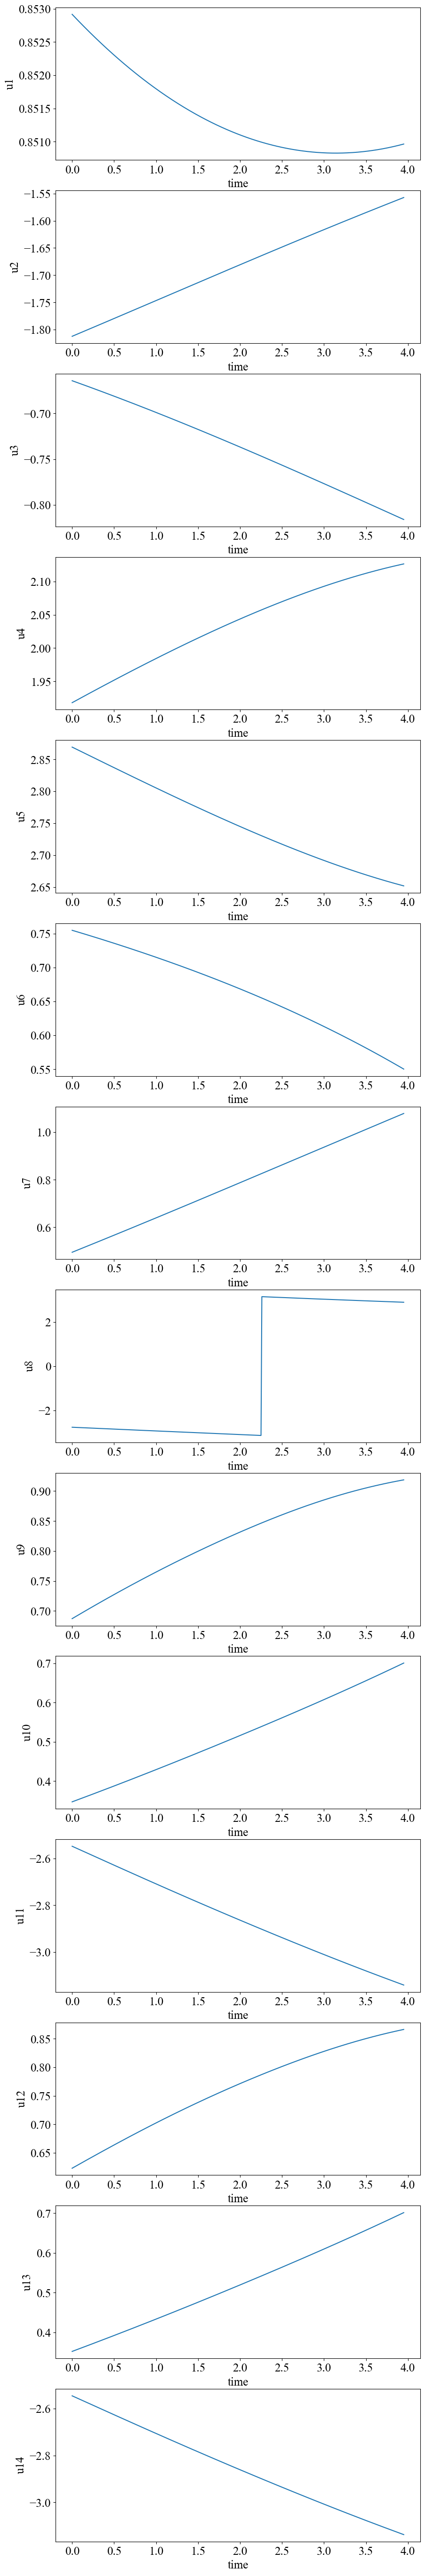

In [15]:
inst_phase = np.zeros(raw_data.shape)
for i in range(raw_data.shape[0]):
    inst_phase[i, ] = np.angle(raw_data[i, :])

plt.rcParams["font.family"] =  'Times New Roman'   # 使用するフォント
plt.rcParams["font.size"] = 18
plt.figure(figsize=(10,70))
for i in range(14):
    plt.subplot(14, 1, i+1)
    plt.ylabel(f"u{i+1}")
    plt.xlabel("time")
    plt.plot(abs(raw_data[-1, :396]), inst_phase[i, :396])
plt.savefig(f"../phase/phase_beta{beta}_nu{runge_para['nu']}_{runge_para['period'][1]}period.png")

# 位相差

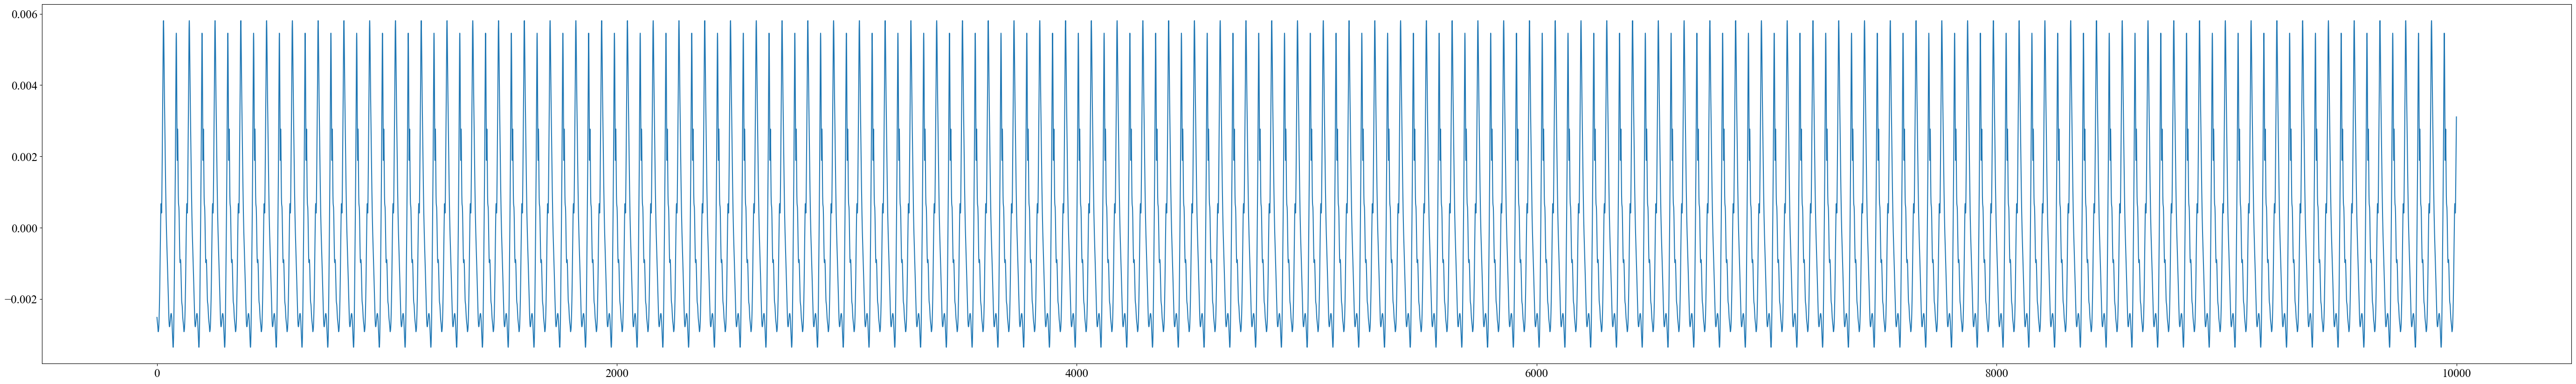

In [11]:
shell1 = 11
shell2 = 14
plt.figure(figsize = (70, 10))
diff = inst_phase[shell1-1, ] - inst_phase[shell2-1, ]
plt.plot(abs(raw_data[-1, ]), diff)

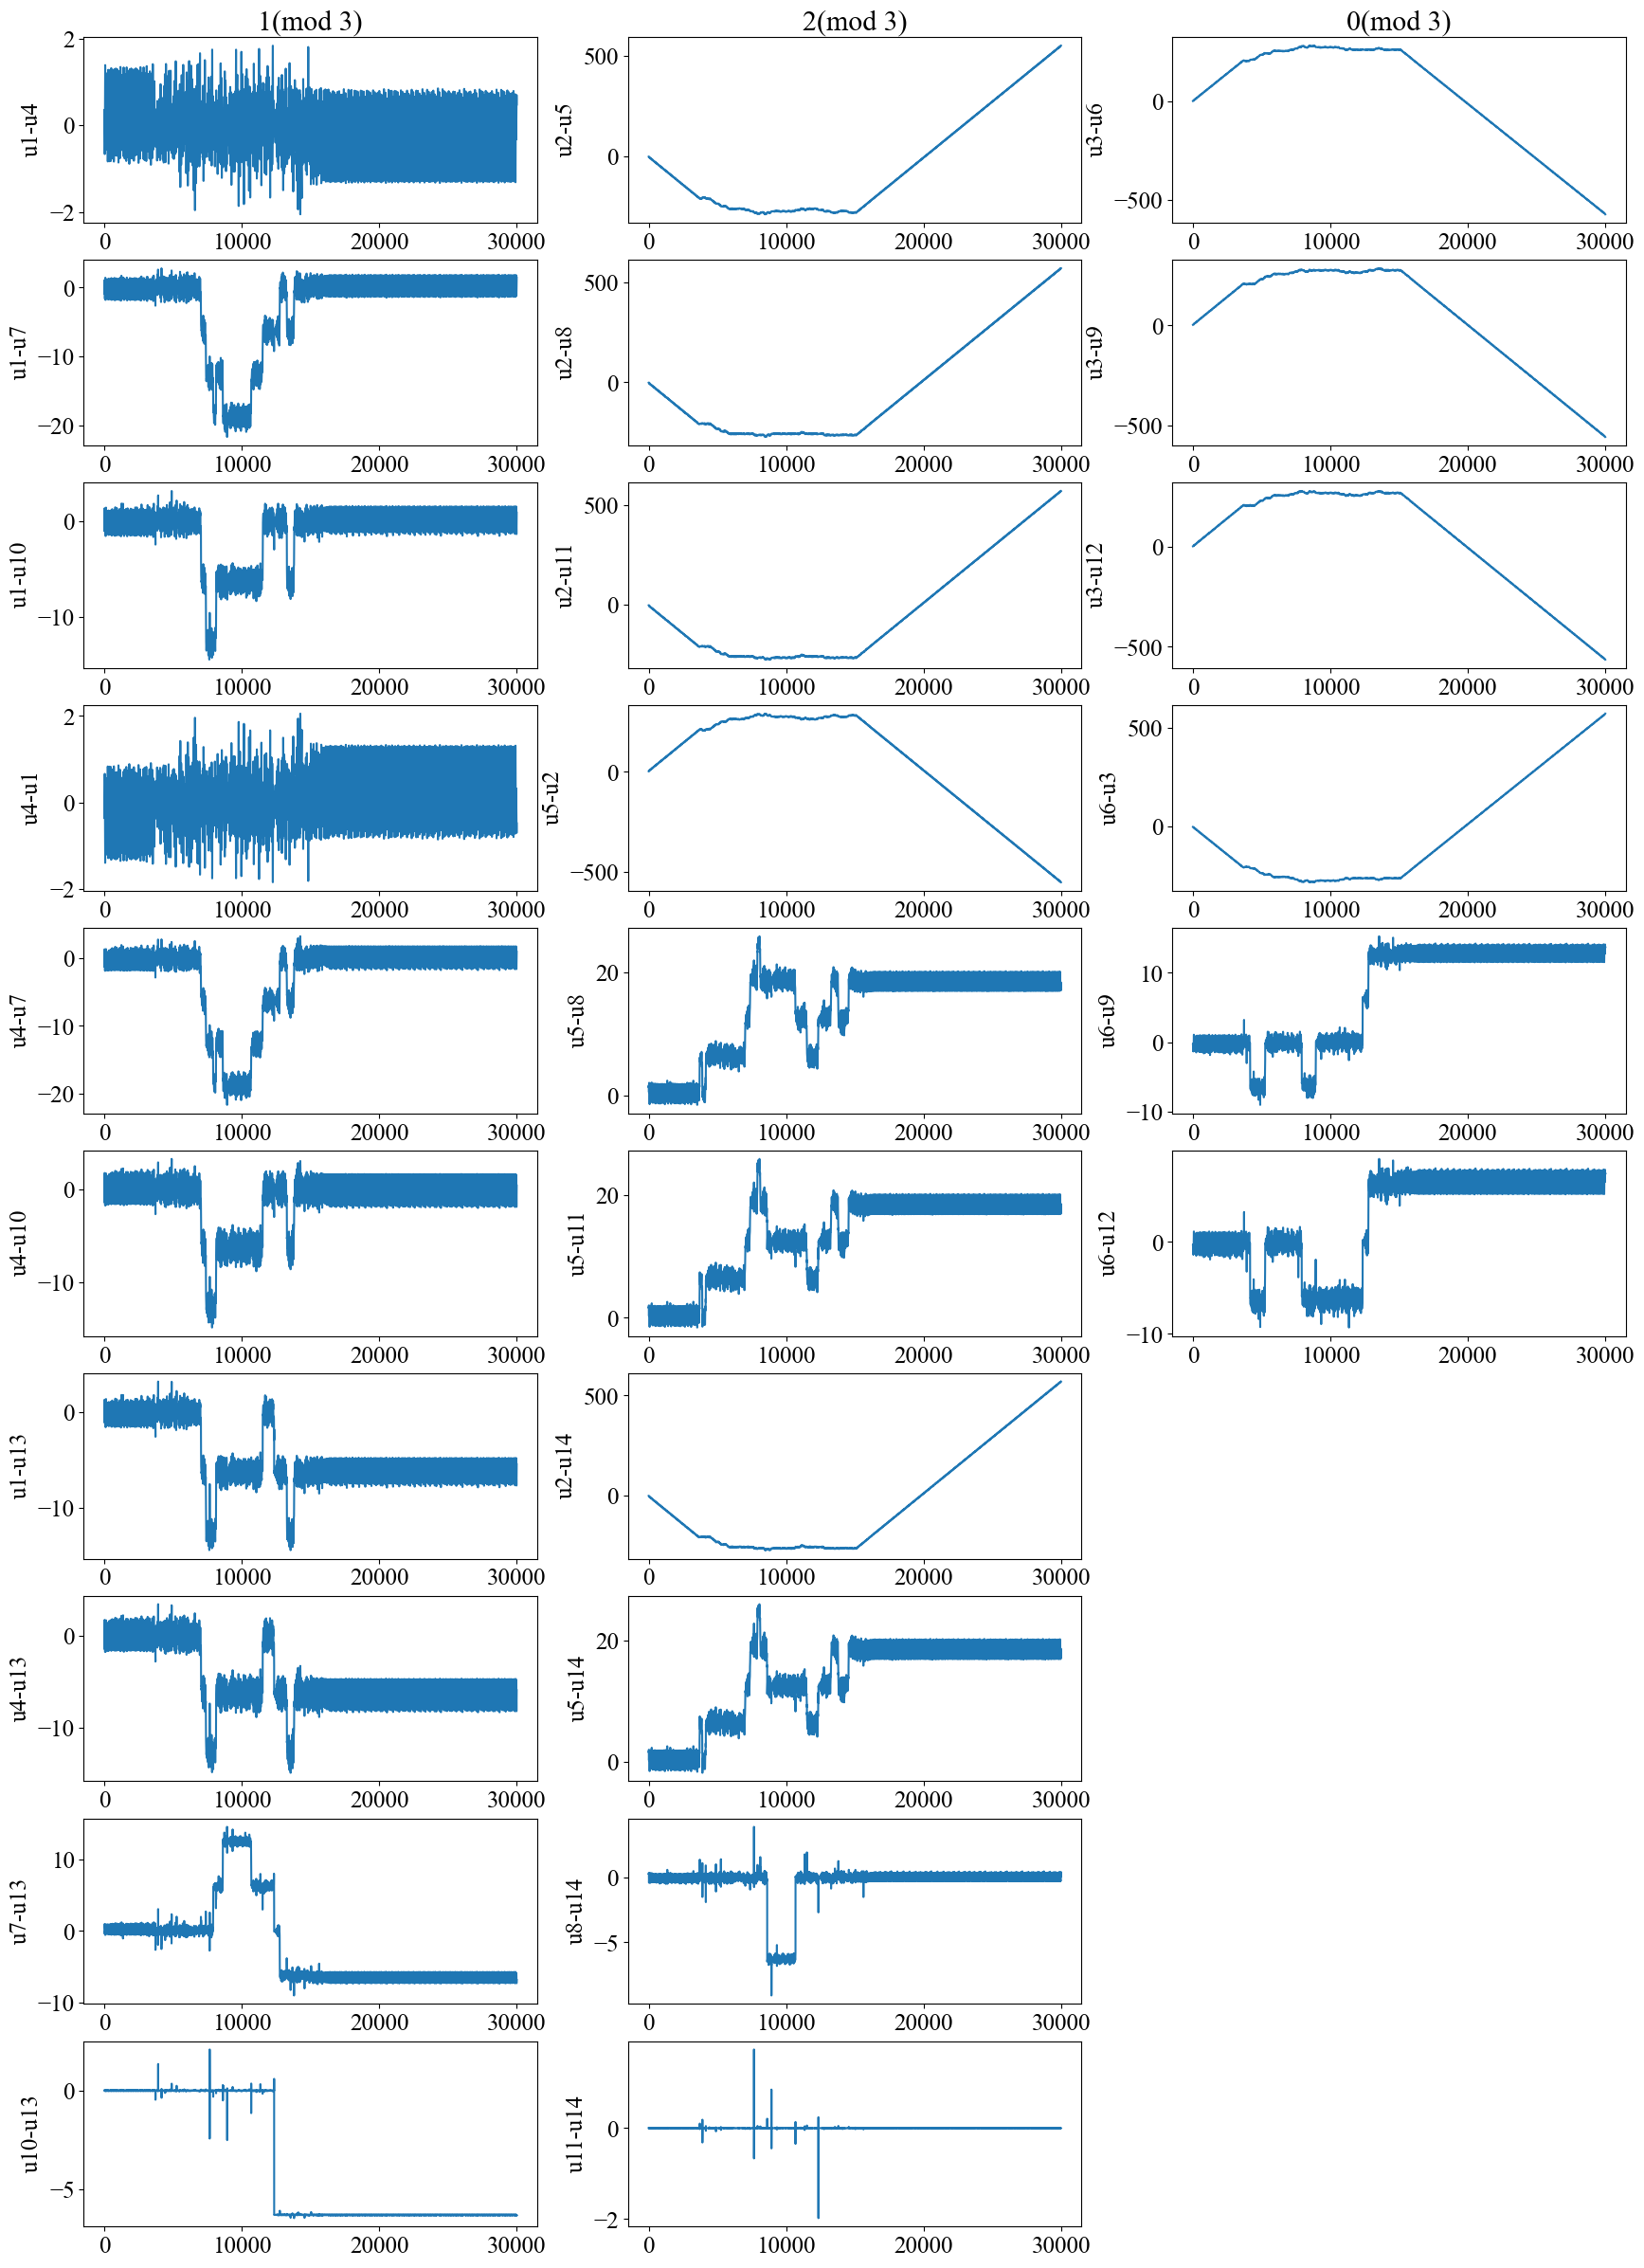

In [128]:
combo_elements = [0, 1, 2, 3]
combo_lst = list(itertools.permutations(combo_elements, 2))
plt.figure(figsize = (21, 30))
for i in range(6):
    for j in range(3):
        plt.subplot(10, 3, i*3+j+1)
        if i == 0:
            plt.title(f"{(j+1)%3}(mod 3)")
        plt.plot(abs(raw_data[-1, ]), inst_phase[3*combo_lst[i][0]+j, ] - inst_phase[3*combo_lst[i][1]+j, ])
        plt.ylabel(f"u{3*combo_lst[i][0]+j+1}-u{3*combo_lst[i][1]+j+1}")

for i in range(4):
    for j in range(2):
        plt.subplot(10, 3, (i+6)*3+j+1)
        plt.plot(abs(raw_data[-1, ]), inst_phase[combo_elements[i]*3+j, ]-inst_phase[12+j, ])
        plt.ylabel(f"u{combo_elements[i]*3+j+1}-u{12+j+1}")
plt.savefig(f"../phase/phase-diff_beta{beta}_nu{runge_para['nu']}_{runge_para['period'][1]}period.png")